# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_Determines_**</p>

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:left; border-radius:10px 10px;">**_Task_**</p>

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_EDA_**</p>

- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Import Libraries_**</p>
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.warn("this will not show")

# Environment settings: 
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', 500)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 500)

In [2]:
# !pip install plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

#Enabling the offline mode for interactive plotting locally
# !pip install cufflinks 
import cufflinks as cf; cf.go_offline()
import plotly.offline as py
from plotly.offline import plot, iplot
from plotly.offline import init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Ingest Data from links below and make a dataframe_**</p>

- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [3]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv",encoding='latin1')
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0      10037                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922   
1      10038                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839   
2      10042                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874   
3      10043                             261            1356                    306                 214          1250                      240               188                384                        364               276               484                  68               340                        294                 144                  1012           253            897                599                     471                372             1430           269                1008   
4      10051                             309            1303                    308                 214          1210                      217               182                378                        320               336               525                  67               300                        295                 135                  1281           284            811                607                     467                433             1362           305                1089   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1         206         1234    

In [4]:
df_male = pd.read_csv("ANSUR II MALE Public.csv",encoding='latin1')
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  \
0      10027                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074   
1      10032                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021   
2      10033                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120   
3      10092                             234            1347                    310                 230          1239                      262               199                401                        359               262               518                  73               328                        309                 143                   991           242            821                560                     437                395             1423           296                1114   
4      10093                             250            1585                    372                 247          1478                      267               224                435                        356               263               524                  80               340                        310                 138                  1029           275           1080                706                     567                425             1684           304                1048   

   chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1         253         1244    

In [5]:
df_female.shape, df_male.shape

((1986, 108), (4082, 108))

In [6]:
df_female.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    SubjectId                       1986 non-null   int64 
 1    abdominalextensiondepthsitting  1986 non-null   int64 
 2    acromialheight                  1986 non-null   int64 
 3    acromionradialelength           1986 non-null   int64 
 4    anklecircumference              1986 non-null   int64 
 5    axillaheight                    1986 non-null   int64 
 6    balloffootcircumference         1986 non-null   int64 
 7    balloffootlength                1986 non-null   int64 
 8    biacromialbreadth               1986 non-null   int64 
 9    bicepscircumferenceflexed       1986 non-null   int64 
 10   bicristalbreadth                1986 non-null   int64 
 11   bideltoidbreadth                1986 non-null   int64 
 12   bimalleolarbreadth              

In [7]:
df_male.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [8]:
print(df_female.columns==df_male.columns)

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [9]:
df_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [10]:
print(df_female.columns==df_male.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [11]:
df = pd.concat([df_female,df_male], ignore_index=True)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_Explore Data Analysis_**</p>

In [12]:
df.head().T

0                       1                       2                       3             4
subjectid                                10037                   10038                   10042                   10043         10051
abdominalextensiondepthsitting             231                     194                     183                     261           309
acromialheight                            1282                    1379                    1369                    1356          1303
acromionradialelength                      301                     320                     329                     306           308
anklecircumference                         204                     207                     233                     214           214
axillaheight                              1180                    1292                    1271                    1250          1210
balloffootcircumference                    222                     225                     237                     240           217
balloffootlength                           177                     178                     196                     188           182
biacromialbreadth                          373                     372                     397                     384           378
bicepscircumferenceflexed                  315                     272                     300                     364           320
bicristalbreadth                           263                     250                     276                     276           336
bideltoidbreadth                           466                     430                     450                     484           525
bimalleolarbreadth                          65                      64                      69                      68            67
bitragionchinarc                           338                     294                     309                     340           300
bitragionsubmandibulararc                  301                     270                     270                     294           295
bizygomaticbreadth                         141                     126                     128                     144           135
buttockcircumference                      1011                     893                     987                    1012          1281
buttockdepth                               223                     186                     204                     253           284
buttockheight                              836                     900                     861                     897           811
buttockkneelength                          587                     583                     583                     599           607
buttockpopliteallength                     476                     483                     466                     471           467
calfcircumference                          360                     350                     384                     372           433
cervicaleheight                           1336                    1440                    1451                    1430          1362
chestbreadth                               274                     261                     287                     269           305
chestcircumference                         922                     839                     874                    1008          1089
chestdepth                                 245                     206                     223                     285           290
chestheight                               1095                    1234                    1226                    1170          1112
crotchheight                               759                     835                     821                     804           726
crotchlengthomphalion                      557                     549                     643                     640           686
crotchlengthposterioromphalion             310         

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [15]:
(df.isna().mean()*100)

subjectid                          0.00000
abdominalextensiondepthsitting     0.00000
acromialheight                     0.00000
acromionradialelength              0.00000
anklecircumference                 0.00000
axillaheight                       0.00000
balloffootcircumference            0.00000
balloffootlength                   0.00000
biacromialbreadth                  0.00000
bicepscircumferenceflexed          0.00000
bicristalbreadth                   0.00000
bideltoidbreadth                   0.00000
bimalleolarbreadth                 0.00000
bitragionchinarc                   0.00000
bitragionsubmandibulararc          0.00000
bizygomaticbreadth                 0.00000
buttockcircumference               0.00000
buttockdepth                       0.00000
buttockheight                      0.00000
buttockkneelength                  0.00000
buttockpopliteallength             0.00000
calfcircumference                  0.00000
cervicaleheight                    0.00000
chestbreadt

In [16]:
df.describe().T

count          mean           std      min       25%      50%       75%       max
subjectid                       6068.0  20757.198418  13159.390894  10027.0  14841.75  20063.5  27234.50  920103.0
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0    219.00    242.0    271.00     451.0
acromialheight                  6068.0   1406.161338     79.091048   1115.0   1350.00   1410.0   1462.00    1683.0
acromionradialelength           6068.0    327.374423     20.720018    249.0    313.00    328.0    341.25     393.0
anklecircumference              6068.0    224.891397     16.051833    156.0    214.00    225.0    235.00     293.0
axillaheight                    6068.0   1299.608767     72.022286   1038.0   1249.00   1302.0   1349.00    1553.0
balloffootcircumference         6068.0    244.192650     16.845020    186.0    232.00    245.0    256.00     306.0
balloffootlength                6068.0    194.754614     13.516368    151.0    185.00    195.0    204.00     245.0
biacromialbreadth               6068.0    399.204186     30.236914    283.0    376.00    404.0    421.00     489.0
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0    311.00    341.0    370.00     490.0
bicristalbreadth                6068.0    274.735003     19.221034    197.0    262.00    274.0    288.00     362.0
bideltoidbreadth                6068.0    490.754450     42.135535    357.0    460.00    492.0    520.00     637.0
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0     68.00     72.0     76.00      91.0
bitragionchinarc                6068.0    324.896506     17.087501    267.0    314.00    326.0    336.00     385.0
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0    292.00    307.0    321.00     390.0
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0    135.00    140.0    145.00     174.0
buttockcircumference            6068.0   1020.084707     76.422643    737.0    968.00   1017.0   1068.00    1341.0
buttockdepth                    6068.0    241.619974     26.482986    168.0    222.00    241.0    259.00     349.0
buttockheight                   6068.0    870.152274     54.822574    656.0    832.00    868.0    906.25    1080.0
buttockkneelength               6068.0    608.999176     33.792839    466.0    586.00    609.0    632.00     736.0
buttockpopliteallength          6068.0    497.097561     29.082390    367.0    477.00    497.0    517.00     605.0
calfcircumference               6068.0    386.041200     30.647180    266.0    364.75    385.0    406.00     523.0
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   1418.00   1484.0   1537.00    1738.0
chestbreadth                    6068.0    282.859097     20.659397    213.0    268.00    283.0    297.00     363.0
chestcircumference              6068.0   1022.098879    100.671751    695.0    949.00   1020.5   1092.00    1469.0
chestdepth                      6068.0    251.738464     26.777843    170.0    233.00    251.0    270.00     383.0
chestheight                     6068.0   1252.013184     79.583972    984.0   1196.00   1259.0   1309.00    1506.0
crotchheight                    6068.0    825.110086     54.748240    610.0    787.00    825.0    863.00    1031.0
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0    590.00    620.0    651.00     799.0
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0    330.00    350.0    372.00     468.0
earbreadth                      6068.0     35.132169      3.231469     25.0     33.00     35.0     37.00      46.0
earlength                       6068.0     62.625906      4.876264     46.0     59.00     62.0     66.00      81.0
earprotrusion                   6068.0     22.263349      3.172715     13.0     20.00     22.0     24.00      34.0
elbowrestheight                 6068.0    240.911338     28.509447    138.0    222.00    241.0    261.00     345.0
eyeheigh

In [17]:
"""cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral']"""

df.describe(include='number').style.background_gradient(cmap='Spectral', axis=1)

In [18]:
df.describe(include='O').T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [20]:
df.nunique().sort_values()

Gender                               2
WritingPreference                    3
Branch                               3
Component                            3
DODRace                              7
Installation                        12
earprotrusion                       22
earbreadth                          22
Heightin                            29
earlength                           36
bimalleolarbreadth                  37
handbreadth                         38
Age                                 42
heelbreadth                         42
SubjectNumericRace                  44
tragiontopofhead                    46
lateralmalleolusheight              47
headbreadth                         48
footbreadthhorizontal               49
palmlength                          50
bizygomaticbreadth                  50
headlength                          55
mentonsellionlength                 55
interpupillarybreadth               56
shoulderlength                      78
wristcircumference       

In [21]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
]).T.style.background_gradient(cmap='PRGn', axis=1)

In [22]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [23]:
pd.DataFrame(df).corr().style.applymap(color_red)

In [24]:
df.corr().style.background_gradient(cmap='RdPu')

In [25]:
for column in df.select_dtypes("object"):            
    print(f"{column:25} column has {df[column].nunique():5}  unique values.")

Gender                    column has     2  unique values.
Date                      column has   253  unique values.
Installation              column has    12  unique values.
Component                 column has     3  unique values.
Branch                    column has     3  unique values.
PrimaryMOS                column has   285  unique values.
SubjectsBirthLocation     column has   152  unique values.
Ethnicity                 column has   209  unique values.
WritingPreference         column has     3  unique values.


In [26]:
for column in df.select_dtypes("int64"):                 
    print(f"{column:35} column has {df[column].nunique():5}  unique values.")

subjectid                           column has  6068  unique values.
abdominalextensiondepthsitting      column has   218  unique values.
acromialheight                      column has   432  unique values.
acromionradialelength               column has   133  unique values.
anklecircumference                  column has   112  unique values.
axillaheight                        column has   402  unique values.
balloffootcircumference             column has   107  unique values.
balloffootlength                    column has    86  unique values.
biacromialbreadth                   column has   169  unique values.
bicepscircumferenceflexed           column has   237  unique values.
bicristalbreadth                    column has   132  unique values.
bideltoidbreadth                    column has   244  unique values.
bimalleolarbreadth                  column has    37  unique values.
bitragionchinarc                    column has   107  unique values.
bitragionsubmandibulararc         

In [27]:
drop_list = ["PrimaryMOS", "Installation", "Ethnicity","subjectid", "Date", "SubjectNumericRace", 
             "Weightlbs","Component",'Age', 'WritingPreference','Branch','Heightin' ]

In [28]:
df.drop(columns = drop_list, inplace=True)

In [29]:
df.shape

(6068, 96)

In [30]:
df.isnull().sum().any()

False

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%; text-align:center; border-radius:10px 10px;">**_The Examination of Target Variable_**</p>

In [31]:
df["DODRace"].value_counts().sum()

6068

In [32]:
df["DODRace"].isnull().sum()

0

In [33]:
df.DODRace.unique()

array([2, 3, 1, 6, 4, 5, 8], dtype=int64)

In [34]:
df["DODRace"] = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [35]:
df["DODRace"]. value_counts() 

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:Yellow; background-color:red" data-toggle="popover">**_Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)_**</a>


In [36]:
(df['DODRace'].value_counts()<500)

White               False
Black               False
Hispanic            False
Asian                True
Pacific Islander     True
Native American      True
Other                True
Name: DODRace, dtype: bool

In [37]:
df.drop(df[df['DODRace']=="Asian"].index, inplace = True)

In [38]:
df.drop(df[df['DODRace']=="Native American"].index, inplace = True)

In [39]:
df.drop(df[df['DODRace']=="Pacific Islander"].index, inplace = True)

In [40]:
df.drop(df[df['DODRace']=="Other"].index, inplace = True)

In [41]:
df['DODRace'].value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

In [42]:
df.shape

(5769, 96)

In [43]:
df['DODRace'].iplot(kind='hist')

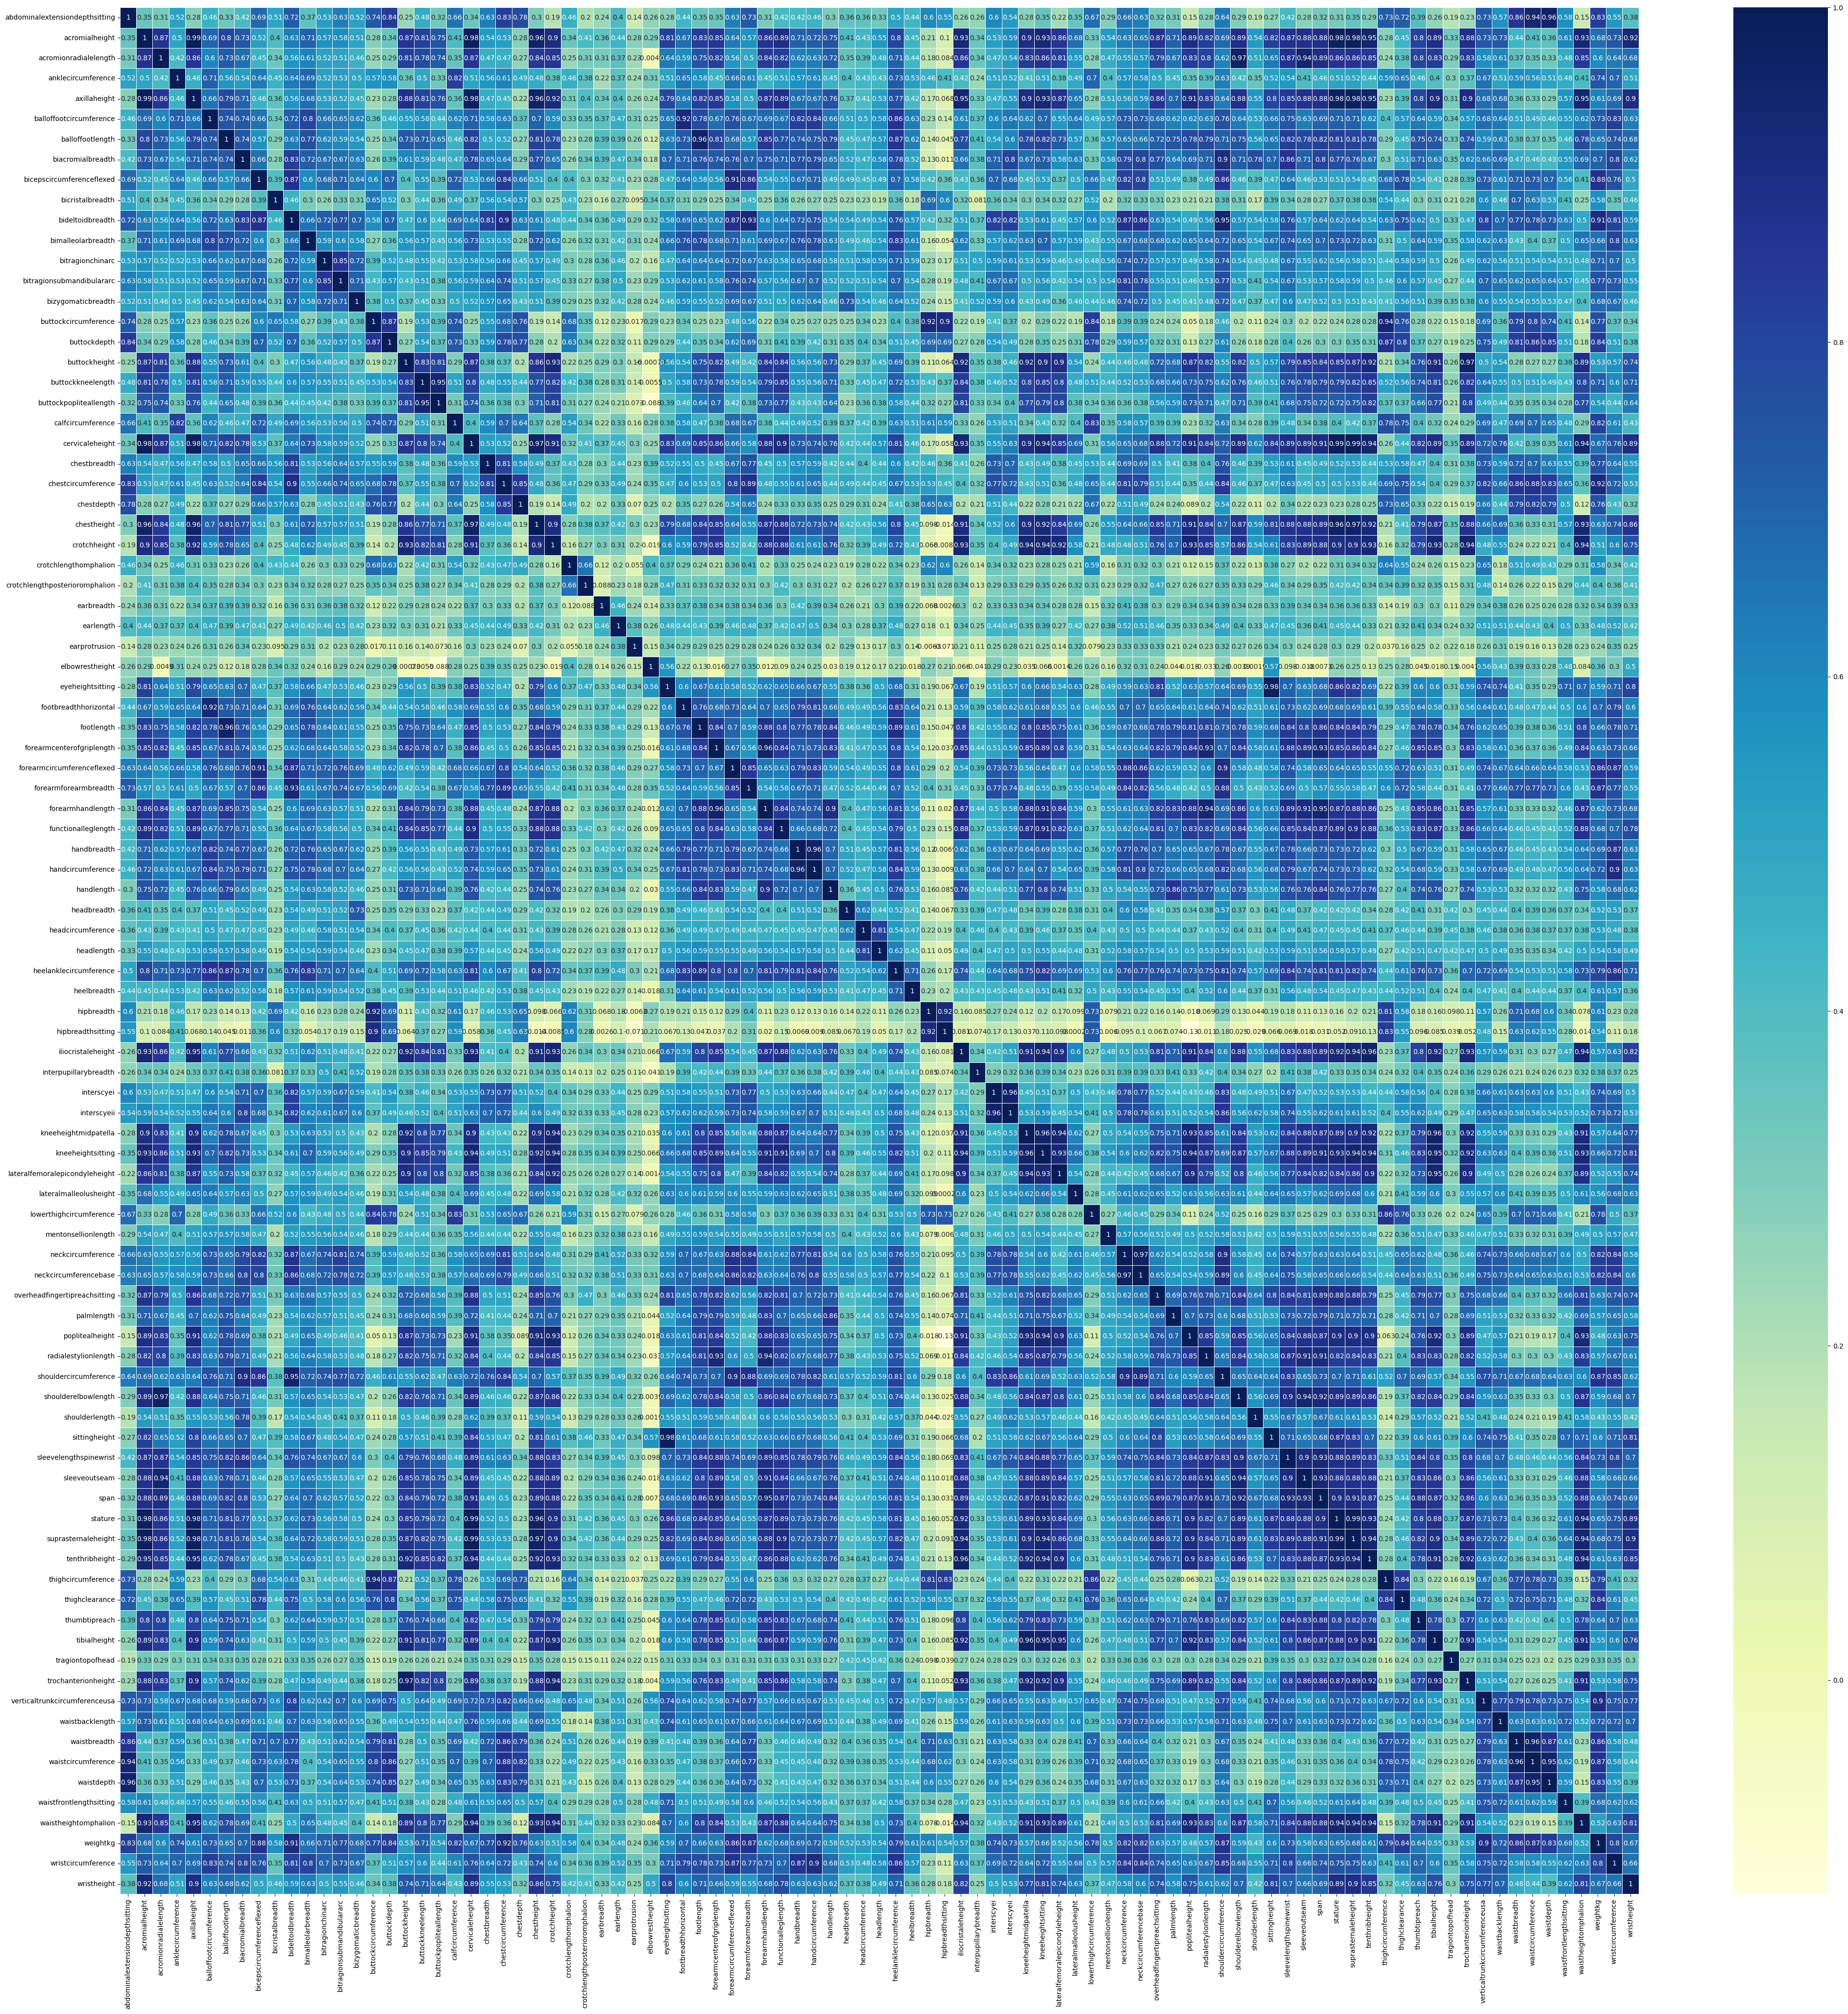

In [44]:
plt.figure(figsize=(50,50))
fig_cor = sns.heatmap(df.corr(), annot=True,linewidths=0.5, cmap="YlGnBu")

# .get_figure().savefig("[png]_heatmap4.png",dpi=300)

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:Blue; font-size:150%; text-align:center; border-radius:10px 10px;">**_DATA Preprocessing_**</p>

- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [45]:
X = df.drop('DODRace',axis=1)
y = df['DODRace']

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Train / Test and Split_**</p>

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=35)

In [47]:
print(y.value_counts(normalize=True))
print()
print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))

White       0.657306
Black       0.224996
Hispanic    0.117698
Name: DODRace, dtype: float64

White       0.657421
Black       0.224919
Hispanic    0.117660
Name: DODRace, dtype: float64

White       0.656846
Black       0.225303
Hispanic    0.117851
Name: DODRace, dtype: float64


In [48]:
print("df boyutu:", df.shape)

print("X_train'in boyutu:", X_train.shape)
print("y_train'in boyutu:", y_train.shape)

print("X_test'in boyutu:", X_test.shape)
print("y_test'in boyutu:", y_test.shape)

df boyutu: (5769, 96)
X_train'in boyutu: (4615, 95)
y_train'in boyutu: (4615,)
X_test'in boyutu: (1154, 95)
y_test'in boyutu: (1154,)


In [49]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, f1_score, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import fbeta_score, make_scorer
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.impute import SimpleImputer
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, cross_validate, RandomizedSearchCV

from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall
from yellowbrick.classifier import PrecisionRecallCurve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import average_precision_score

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_Modelling_**</p>

- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
cat = X_train.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation'], dtype='object')

In [52]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat),
                                                      remainder=MinMaxScaler(),
                                                      verbose_feature_names_out=False)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_1. Logistic model_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla Logistic Model_**</p>

**_Default aldığımızda => hispanic : test_recall = 0.56 train_recall=0.58_**

**_class_weight='balanced' aldığımızda => hispanic : test_recall = 0.74 train_recall=0.85_**

In [53]:
# pipeline_model

operations = [("OneHotEncoder", column_trans), ("logistic", LogisticRegression(class_weight='balanced',random_state=35))]

log_model = Pipeline(steps=operations)

log_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logistic',
                 LogisticRegression(class_weight='balanced', random_state=35))])

In [54]:
eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[241  12   7]
 [  7 101  28]
 [ 15  99 644]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92       260
    Hispanic       0.48      0.74      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 967   37   34]
 [  22  464   57]
 [  66  369 2599]]
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1038
    Hispanic       0.53      0.85      0.66       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:maroon; font-size:150%;  border-radius:10px 10px;">**_Datadan ne istedigimiz onemli. Mesela bu data icin hyspanic dusuk degerde onu yukseltmek istiyoruz. O da recall da, gercekte olanlari yakalama kismiyla ilgileniyoruz._**</p>

In [55]:
scoring = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"])}

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation_**</p>

In [56]:
operations = [("OneHotEncoder", column_trans), 
              ("logistic", LogisticRegression(class_weight='balanced',
                                         random_state=35))]

model_log_cross = Pipeline(steps=operations)

scores = cross_validate(model_log_cross, X_train, y_train, scoring = scoring, cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.492160
train_precision_Hispanic    0.533913
test_recall_Hispanic        0.782773
train_recall_Hispanic       0.853134
test_f1_Hispanic            0.603552
train_f1_Hispanic           0.656765
dtype: float64

<p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">Make Scorer for class Black</p>

In [57]:
scoring_Black = {"f1_Black" : make_scorer(f1_score, average = None, labels =["Black"]),
           "precision_Black" : make_scorer(precision_score, average = None, labels =["Black"]),
           "recall_Black" : make_scorer(recall_score, average = None, labels =["Black"])}

In [58]:
operations = [("OneHotEncoder", column_trans), 
              ("logistic", LogisticRegression(class_weight='balanced',
                                         random_state=35))]

model_Black = Pipeline(steps=operations)

scores_Black = cross_validate(model_Black, X_train, y_train, scoring = scoring_Black, cv = 10, return_train_score=True)
df_scores_Black = pd.DataFrame(scores_Black, index = range(1, 11))
df_scores_Black.mean()[2:]

test_f1_Black            0.903428
train_f1_Black           0.926719
test_precision_Black     0.895340
train_precision_Black    0.917541
test_recall_Black        0.912323
train_recall_Black       0.936095
dtype: float64

<p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">Make Scorer for class White</p>

In [59]:
scoring_White = {"f1_White" : make_scorer(f1_score, average = None, labels =["White"]),
           "precision_White" : make_scorer(precision_score, average = None, labels =["White"]),
           "recall_White" : make_scorer(recall_score, average = None, labels =["White"])}

In [60]:
operations = [("OneHotEncoder", column_trans), 
              ("logistic", LogisticRegression(class_weight='balanced',
                                         random_state=35))]

model_White = Pipeline(steps=operations)

scores_White = cross_validate(model_White, X_train, y_train, scoring = scoring_White, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores_White, index = range(1, 11))
df_scores.mean()[2:]

test_f1_White            0.896430
train_f1_White           0.908170
test_precision_White     0.954791
train_precision_White    0.966137
test_recall_White        0.845099
train_recall_White       0.856771
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Logistic Model GridsearchCV_**</p>

In [61]:
# pipe_model_RF.get_params()

In [62]:
param_grid = {"logistic__penalty" : ["l1", "l2", "elasticnet"],
              "logistic__C" : np.logspace(0, 10, 20),
              "logistic__solver" : ['saga','lbfgs', 'liblinear', 'newton-cg']}

In [63]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [64]:
operations = [("OneHotEncoder", column_trans), 
              ("logistic", LogisticRegression(class_weight='balanced',
                                         random_state=35))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model, param_grid, cv=5, scoring = recall_Hispanic, n_jobs=-1, return_train_score=True)


In [ ]:
log_model_grid.fit(X_train, y_train)

In [68]:
log_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=1438.449888287663, random_state=35))])

In [69]:
pd.DataFrame(log_model_grid.cv_results_).loc[log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.383129
mean_train_score    0.420805
Name: 77, dtype: object

In [70]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[234   8  18]
 [ 18  47  71]
 [  7  25 726]]
              precision    recall  f1-score   support

       Black       0.90      0.90      0.90       260
    Hispanic       0.59      0.35      0.44       136
       White       0.89      0.96      0.92       758

    accuracy                           0.87      1154
   macro avg       0.79      0.73      0.75      1154
weighted avg       0.86      0.87      0.86      1154


Train_Set
[[ 954   20   64]
 [  54  228  261]
 [  37   78 2919]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92      1038
    Hispanic       0.70      0.42      0.52       543
       White       0.90      0.96      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.84      0.77      0.79      4615
weighted avg       0.88      0.89      0.88      4615



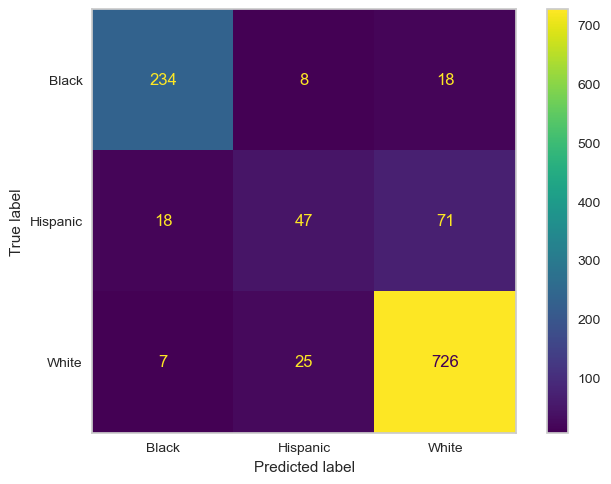

In [71]:
ConfusionMatrixDisplay.from_estimator(log_model_grid, X_test, y_test)
plt.grid(False);

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Logistic Model RandomizedsearchCV_**</p>

---
---

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Visualizing Logistic Regression Model_**</p>  

#### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_ROC Curves_**</p>  

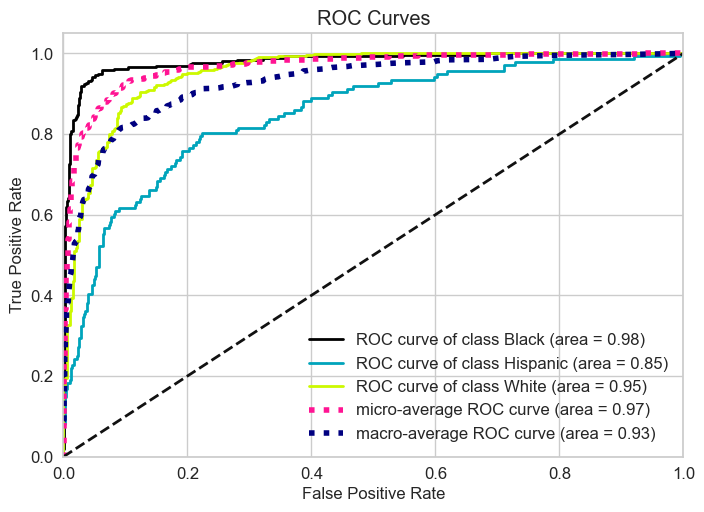

In [72]:
operations = [("OneHotEncoder", column_trans), 
              ("logistic", LogisticRegression(class_weight='balanced',
                                         random_state=35))]

log_tuned = Pipeline(steps=operations)

log_tuned.fit(X_train, y_train)

y_pred_proba = log_tuned.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

#### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Precision_Recall_**</p>  

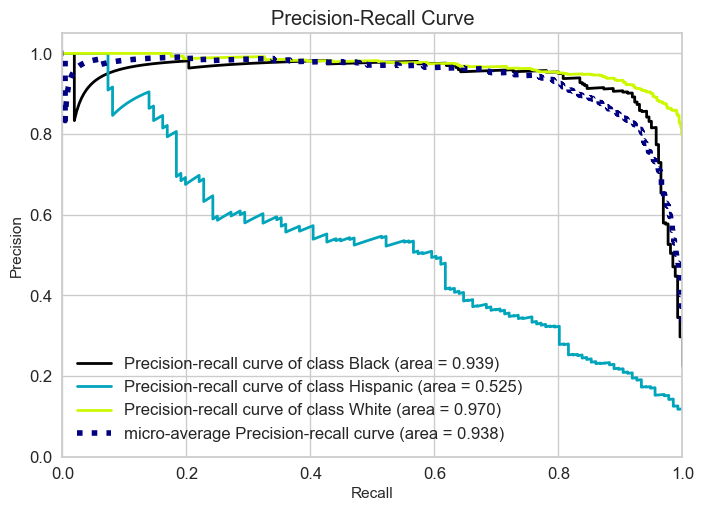

In [73]:
operations = [("OneHotEncoder", column_trans), 
              ("logistic", LogisticRegression(class_weight='balanced',
                                         random_state=35))]
log_tuned = Pipeline(steps=operations)

log_tuned.fit(X_train, y_train)

y_pred_proba = log_tuned.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [74]:
pd.get_dummies(y_test).values

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [75]:
y_test_dummies = pd.get_dummies(y_test).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

# 0 black, 1 hispanic, 2 white skorlarını döndürür.
# Burda 1 vererek hispanic skorları aldık.

0.5247639943790913

In [76]:
y_pred = log_model_grid.predict(X_test)

log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

### recall onemli dedik.
### micro = accuricy

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_2.Support Vector Classication_**</p>

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla SVC model_**</p>

In [77]:
operations = [("scaler", StandardScaler()), ("SVC",SVC(random_state=35))]

svm_model = Pipeline(steps=operations)

svm_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('SVC', SVC(random_state=35))])

In [78]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[237   1  22]
 [ 17  27  92]
 [  7   9 742]]
              precision    recall  f1-score   support

       Black       0.91      0.91      0.91       260
    Hispanic       0.73      0.20      0.31       136
       White       0.87      0.98      0.92       758

    accuracy                           0.87      1154
   macro avg       0.83      0.70      0.71      1154
weighted avg       0.86      0.87      0.85      1154


Train_Set
[[ 965    8   65]
 [  47  142  354]
 [  21    9 3004]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.89      0.26      0.40       543
       White       0.88      0.99      0.93      3034

    accuracy                           0.89      4615
   macro avg       0.90      0.73      0.76      4615
weighted avg       0.89      0.89      0.87      4615



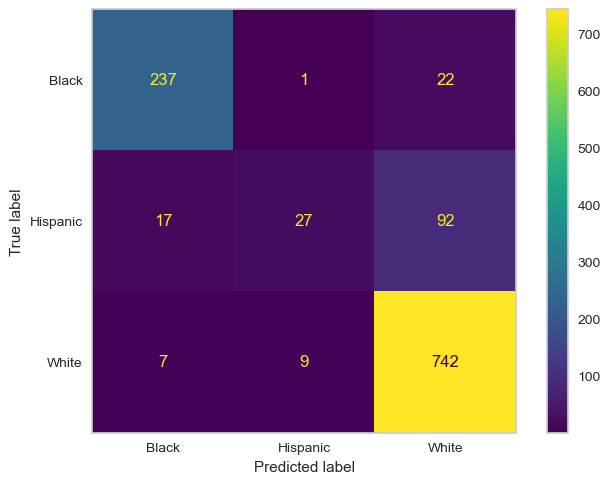

In [79]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.grid(False);

<font  color = 'maroon'><br>
**_- Recall ne derece dogrulugunu yakaladik / recall tek cumle ile 1 classi ni tespit etme orani. 
-Precision tahminlerin ne kadari dogru oldugunun orani / 1 classi icin isabet orani tek cumle ile_**

<font  color = 'maroon'><br>
**_- Vanilla svm model white icin muhtesem tahmin yapiyor. white lari yakalamak icin calisiyorsak vanilla model cok iyi. Fakat burada datanin guzel bir yerinde olup olmadigimizi kontrol icin cross_val yapacagiz._**

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation SVC_**</p>

In [80]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=35))]

svm_model_cross = Pipeline(steps=operations)

scores = cross_validate(svm_model_cross, X_train, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.713929
train_precision_Hispanic    0.915631
test_recall_Hispanic        0.147508
train_recall_Hispanic       0.245356
test_f1_Hispanic            0.243730
train_f1_Hispanic           0.386627
dtype: float64

#### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Make Score Black_**</p>

In [84]:
scoring_Black = f1_Black_ = make_scorer(f1_score, average = None, labels =["Black"])
precision_Black_ = make_scorer(precision_score, average = None, labels =["Black"])
recall_Black_ = make_scorer(recall_score, average = None, labels =["Black"])


operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=35))]

make_model_Black = Pipeline(steps=operations)

scores_B = cross_validate(make_model_Black, X_train, y_train, scoring = scoring_Black, cv = 10, return_train_score=True)
df_scores= pd.DataFrame(scores_B, index = range(1, 11))
df_scores.mean()[2:]

test_score     0.895219
train_score    0.933327
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_SVC Model GridsearchCV_**</p>  

In [85]:
param_grid_svc = {'SVC__C': [0.001, 0.05, 0.01, 0.1],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3],
              'SVC__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
              'SVC__class_weight': ["balanced", None]}

In [86]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state=35))]
pipe_model_grid = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model_grid, 
                              param_grid_svc, 
                              scoring = recall_Hispanic, 
                              cv=5,
                              n_jobs=-1,
                              return_train_score=True)

In [87]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(random_state=35))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.001, 0.05, 0.01, 0.1],
                         'SVC__class_weight': ['balanced', None],
                         'SVC__gamma': ['scale', 'auto', 0.2, 0.3],
                         'SVC__kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [88]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.05, class_weight='balanced', kernel='linear',
                     random_state=35))])

In [89]:
pd.DataFrame(svm_model_grid.cv_results_).loc[svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.690707
mean_train_score    0.739871
Name: 33, dtype: object

In [90]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[236  17   7]
 [ 19  91  26]
 [ 17 126 615]]
              precision    recall  f1-score   support

       Black       0.87      0.91      0.89       260
    Hispanic       0.39      0.67      0.49       136
       White       0.95      0.81      0.87       758

    accuracy                           0.82      1154
   macro avg       0.74      0.80      0.75      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[ 941   72   25]
 [  42  396  105]
 [  76  514 2444]]
              precision    recall  f1-score   support

       Black       0.89      0.91      0.90      1038
    Hispanic       0.40      0.73      0.52       543
       White       0.95      0.81      0.87      3034

    accuracy                           0.82      4615
   macro avg       0.75      0.81      0.76      4615
weighted avg       0.87      0.82      0.84      4615



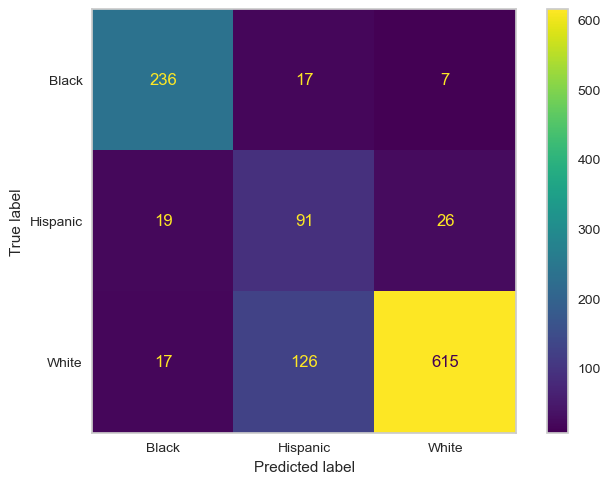

In [91]:
ConfusionMatrixDisplay.from_estimator(svm_model_grid, X_test, y_test)
plt.grid(False);

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Randomized Search CV_**</p>  

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Visualizing SVM Model_**</p>  

decision_function = svm_model_grid.decision_function(X_test)
decision_function

#### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_ROC Curves_**</p> 

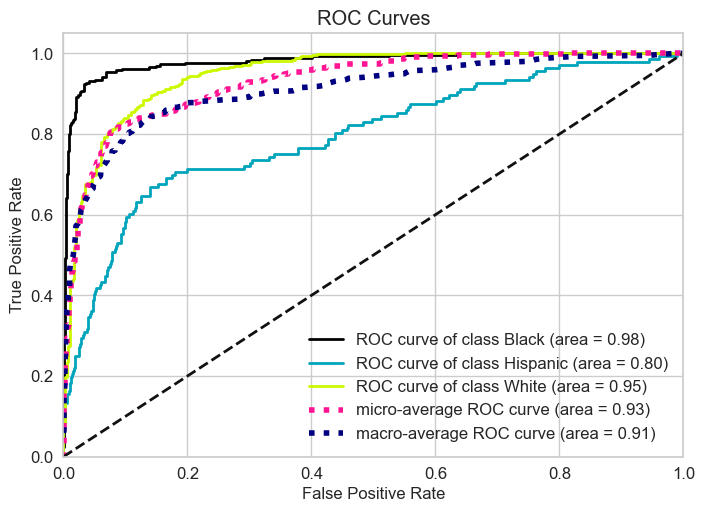

In [92]:
operations = [("scaler", StandardScaler()),
              ("SVC", SVC(C=0.05, class_weight='balanced', kernel='linear', random_state=35))]


model = Pipeline(steps=operations)

model.fit(X_train, y_train)


y_pred_decision = model.decision_function(X_test)
    
plot_roc(y_test, y_pred_decision)
plt.show();

#### Logistic - Precision - Recall - Auc

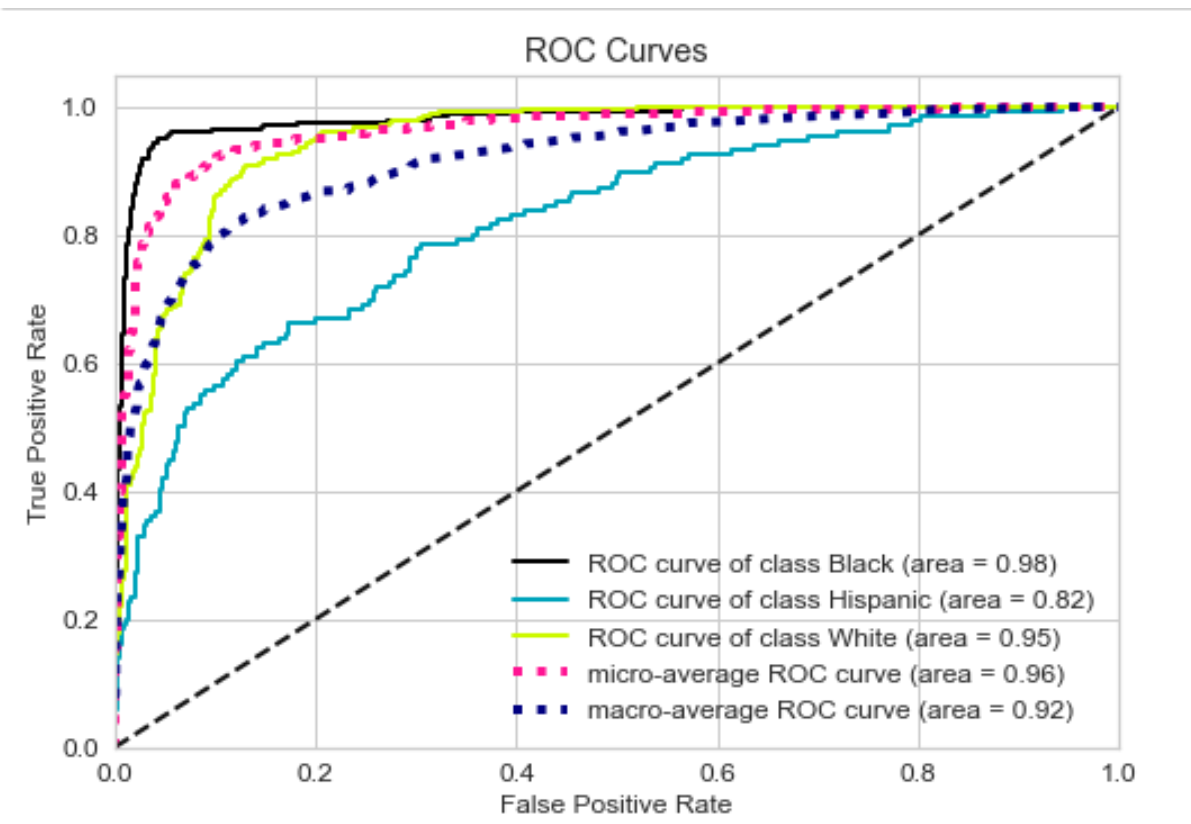

<font  color = 'maroon'><br>
**Bu ikisinin yorumlamasi sorulabilir. Logistic te hispanic skorlari cok daha dusuk, ama roc_curve ye gore 0.82 ile daha iyi gorunuyor.
Siniflari ayristirma orani / ayrisabiliyor mu kontrolu bu curve ler.**

#### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Precision_Recall_**</p>  

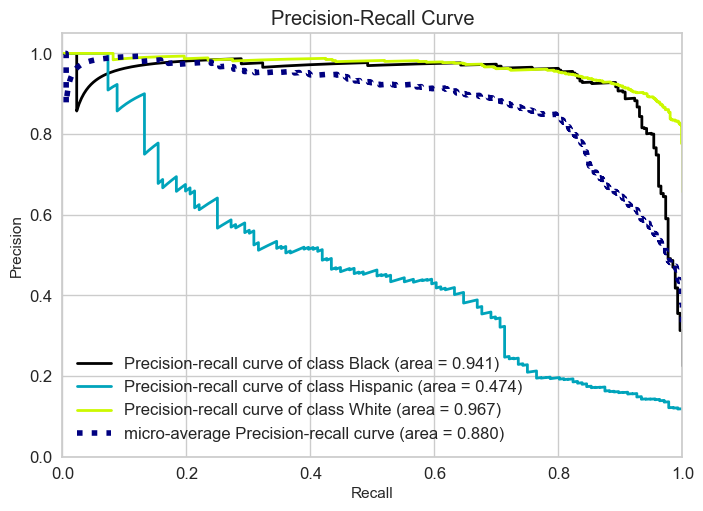

In [93]:
operations = [("scaler", StandardScaler()),
              ("SVC", SVC(C=0.05, class_weight='balanced', kernel='linear', random_state=35))]

svm_tuned = Pipeline(steps=operations)

svm_tuned.fit(X_train, y_train)


decision_function = svm_tuned.decision_function(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [94]:
decision_function

array([[-0.2658887 ,  0.96958878,  2.26723142],
       [-0.25365771,  1.21046936,  2.19841347],
       [-0.29026415,  1.20459795,  2.27913452],
       ...,
       [ 2.30778037,  0.74998012, -0.30014552],
       [-0.27120559,  2.26305259,  1.12787724],
       [-0.27032344,  1.19680091,  2.24672517]])

In [95]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.47362405758470694

In [96]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_3.Random Forest_**</p>

<font  color = 'maroon'><br>
**_Treebase modellerde scale gerekmiyor_**

In [ ]:
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', 
                         unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), 
                                       remainder='passthrough')

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla RF Model_**</p>

In [97]:
operations = [("RF", RandomForestClassifier(random_state=35))]

rf_pipe_model = Pipeline(steps=operations)

rf_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('RF', RandomForestClassifier(random_state=35))])

In [98]:
eval_metric(rf_pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[190   0  70]
 [ 16  12 108]
 [ 12   3 743]]
              precision    recall  f1-score   support

       Black       0.87      0.73      0.79       260
    Hispanic       0.80      0.09      0.16       136
       White       0.81      0.98      0.89       758

    accuracy                           0.82      1154
   macro avg       0.83      0.60      0.61      1154
weighted avg       0.82      0.82      0.78      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation_**</p>

In [101]:
operations = [("RF", RandomForestClassifier(random_state=35))]

model_rf_cross = Pipeline(steps=operations)

scores = cross_validate(model_rf_cross, X_train, y_train, scoring = scoring , cv = 5, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.595030
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.049694
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.091334
train_f1_Hispanic           1.000000
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_RF Model GridsearchCV_**</p> 

In [ ]:
# pipe_model_RF.get_params()

In [102]:
rf_params = {"RF_model__n_estimators":[400,500],
              "RF_model__max_features": ['auto', None, 15, 20],
              "RF_model__max_depth": [2, 3]}

In [103]:
operations = [("RF_model", RandomForestClassifier(class_weight="balanced", random_state=35))]

model = Pipeline(steps=operations)

rf_model_grid = GridSearchCV(estimator=model,
                            param_grid=rf_params,
                            scoring=recall_Hispanic,
                            cv=5,
                            n_jobs=-1,
                            return_train_score=True)

In [104]:
rf_model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=35))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', None, 15, 20],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [105]:
rf_model_grid.best_params_

{'RF_model__max_depth': 3,
 'RF_model__max_features': 'auto',
 'RF_model__n_estimators': 400}

In [106]:
rf_model_grid.best_estimator_

Pipeline(steps=[('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        max_features='auto', n_estimators=400,
                                        random_state=35))])

In [107]:
pd.DataFrame(rf_model_grid.cv_results_).loc[rf_model_grid.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.572919
mean_train_score    0.631685
Name: 8, dtype: object

In [108]:
eval_metric(rf_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[189  41  30]
 [ 20  84  32]
 [ 73 257 428]]
              precision    recall  f1-score   support

       Black       0.67      0.73      0.70       260
    Hispanic       0.22      0.62      0.32       136
       White       0.87      0.56      0.69       758

    accuracy                           0.61      1154
   macro avg       0.59      0.64      0.57      1154
weighted avg       0.75      0.61      0.65      1154


Train_Set
[[ 816  132   90]
 [  46  346  151]
 [ 268 1002 1764]]
              precision    recall  f1-score   support

       Black       0.72      0.79      0.75      1038
    Hispanic       0.23      0.64      0.34       543
       White       0.88      0.58      0.70      3034

    accuracy                           0.63      4615
   macro avg       0.61      0.67      0.60      4615
weighted avg       0.77      0.63      0.67      4615



accuracy_score(y_test, y_pred)

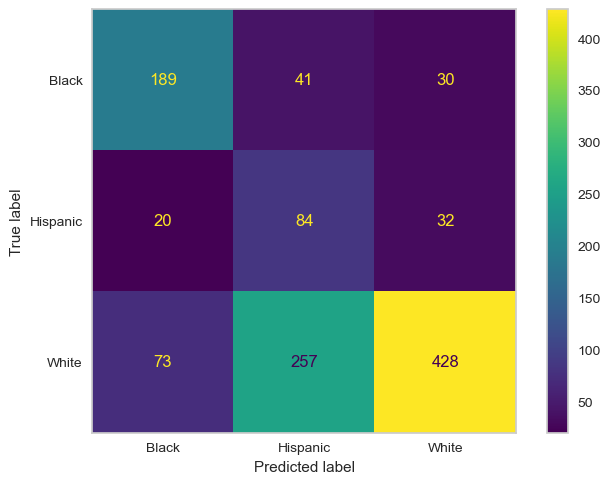

In [110]:
ConfusionMatrixDisplay.from_estimator(rf_model_grid, X_test, y_test)
plt.grid(False);

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Visualizing Random Forest Model_**</p> 

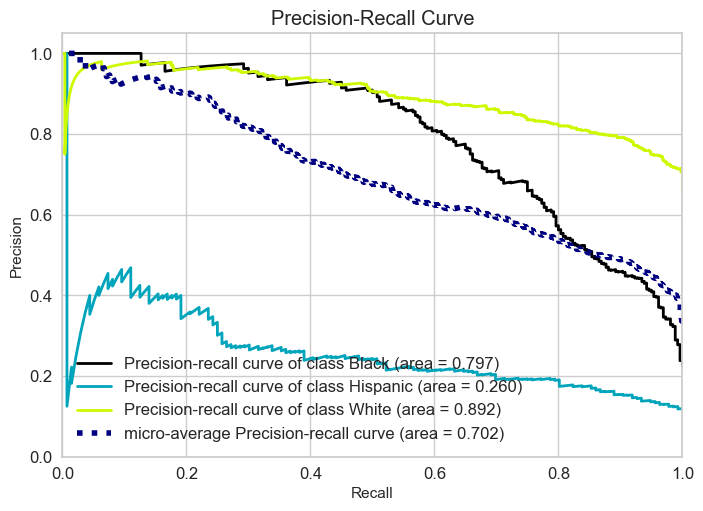

In [111]:
operations_rf = [("RF_model", RandomForestClassifier(class_weight='balanced', max_depth=3,
                       max_features='auto', n_estimators=400, random_state=35))]


model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [112]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.26040201330490664

In [114]:
y_pred = rf_model_grid.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_4.XGBosst_**</p>

In [115]:
df1= df.copy()

In [116]:
df1["DODRace"] = df1.DODRace.map({
    "White": 0,
    "Black": 1,
    "Hispanic": 2
})

In [117]:
X1 = df1.drop('DODRace',axis=1)
y1 = df1['DODRace']

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_xgb, y_test_xgb = train_test_split(X1, y1, test_size=0.20, stratify=y, random_state=35)

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Vanilla XGBoost Model_**</p>

In [119]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=35))]

pipe_model_xgb = Pipeline(steps=operations)

pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [120]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[728  12  18]
 [ 29 225   6]
 [ 90  16  30]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       758
           1       0.89      0.87      0.88       260
           2       0.56      0.22      0.32       136

    accuracy                           0.85      1154
   macro avg       0.77      0.68      0.70      1154
weighted avg       0.83      0.85      0.83      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [122]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', 
                                                     y=y_train_xgb)
classes_weights

# XGboost algortimasının multiclass datalar için weight_class hyper parametresi olmadığından. fit fonksiyonu içinde 
# sample_weight hyper paremetresini kullanabiliyoruz.

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       1.4820167 ])

In [123]:
my_dict = {"weights": classes_weights, "label":y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
5667  0.507031      0
3008  0.507031      0
4809  0.507031      0
5438  1.482017      1
2591  0.507031      0

In [124]:
comp.groupby("label").value_counts()

# weight x class_sayısı bize aynı sonuçları verecektir.

label  weights 
0      0.507031    3034
1      1.482017    1038
2      2.833026     543
dtype: int64

In [126]:
pipe_model_xgb.fit(X_train,
                   y_train_xgb,  
                  xgb__sample_weight=classes_weights)

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [127]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[703  24  31]
 [ 24 226  10]
 [ 73  19  44]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       758
           1       0.84      0.87      0.85       260
           2       0.52      0.32      0.40       136

    accuracy                           0.84      1154
   macro avg       0.75      0.71      0.72      1154
weighted avg       0.83      0.84      0.83      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [128]:
scoring_xgb = {"precision_Hispanic" : make_scorer(precision_score, average = None, labels =[2]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =[2]),
           "f1_Hispanic" : make_scorer(f1_score, average = None, labels =[2])}

# xgb categoric target kabul etmediğinden hispaniclere karşılık gelen 2 numeric clasıına göre scoring_xgb'u düzenliyoruz.

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Cross Validation_**</p>

In [130]:
operations_xgb = [("OrdinalEncoder", column_trans), 
                  ("XGB_model", XGBClassifier(random_state=35))]
model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, 
                        X_train, 
                        y_train_xgb, 
                        scoring=scoring_xgb,
                        cv=5, 
                        return_train_score=True,
                        fit_params={"xgb__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.552785
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.289246
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.377504
train_f1_Hispanic           1.000000
dtype: float64

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_XGBoost Model GridsearchCV_**</p>

In [131]:
param_grid_xgb = {"xgb__n_estimators":[20, 40],
              'xgb__max_depth':[2, 3, 7],
              "xgb__learning_rate": [0.01, 0.03, 0.1],
              "xgb__subsample":[0.8, 1],
              "xgb__colsample_bytree":[0.8, 1]}

In [132]:
operations_xgb = [("OrdinalEncoder", column_trans),
                  ("XGB_model", XGBClassifier(random_state=35))]

model= Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid_xgb, 
                              scoring=make_scorer(recall_score, average = None, labels =[2]),
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [133]:
xgb_grid_model.fit(X_train, y_train_xgb, xgb__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constraints=N...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=35, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.8, 1],
                         'xgb__learning_rate': [0.01, 0.03, 0.1],
                         'xgb__max_depth': [2, 3, 7],
                         'xgb__n_estimators': [20, 40],
                         'xgb__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [134]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=40,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))])

In [136]:
xgb_grid_model.best_params_

{'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 40,
 'xgb__subsample': 1}

In [139]:
xgb_grid_model.best_score_

0.5857118586476384

In [138]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score     0.585712
mean_train_score    0.680018
Name: 63, dtype: object

In [140]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[515  69 174]
 [ 20 209  31]
 [ 39  20  77]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       758
           1       0.70      0.80      0.75       260
           2       0.27      0.57      0.37       136

    accuracy                           0.69      1154
   macro avg       0.62      0.68      0.63      1154
weighted avg       0.78      0.69      0.72      1154


Train_Set
[[2132  234  668]
 [  73  868   97]
 [ 128   53  362]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      3034
           1       0.75      0.84      0.79      1038
           2       0.32      0.67      0.43       543

    accuracy                           0.73      4615
   macro avg       0.66      0.74      0.67      4615
weighted avg       0.81      0.73      0.75      4615



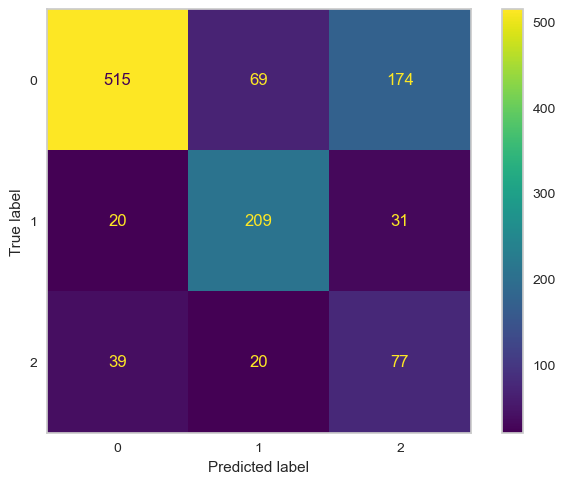

In [141]:
ConfusionMatrixDisplay.from_estimator(xgb_grid_model, X_test, y_test_xgb)
plt.grid(False);

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:green; font-size:150%;  border-radius:10px 10px;">**_Visualizing XGBoost Model_**</p> 

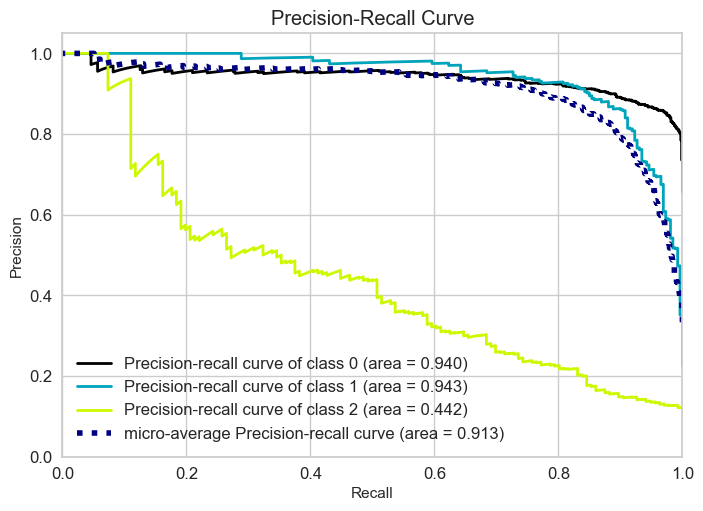

In [142]:
operations_xgb = [("OrdinalEncoder", column_trans),("XGB_model", XGBClassifier({'xgb__colsample_bytree': 1,
 'xgb__learning_rate': 0.1,
 'xgb__max_depth': 2,
 'xgb__n_estimators': 40,
 'xgb__subsample': 1},random_state=35))]

xgb_tuned = Pipeline(steps=operations_xgb)

xgb_tuned.fit(X_train, y_train_xgb,xgb__sample_weight=classes_weights)

y_pred_xgb = xgb_tuned.predict_proba(X_test)
    
plot_precision_recall(y_test_xgb, y_pred_xgb)
plt.show()

In [143]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [145]:
average_precision_score(y_test_xgb_dummies[:, 2], y_pred_proba[:, 2])

0.11173192541078637

In [146]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_xgb_dummies[:, 2], y_pred_proba[:, 2])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[2])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[2])

---
---

---
---

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_Comparing Models_**</p>

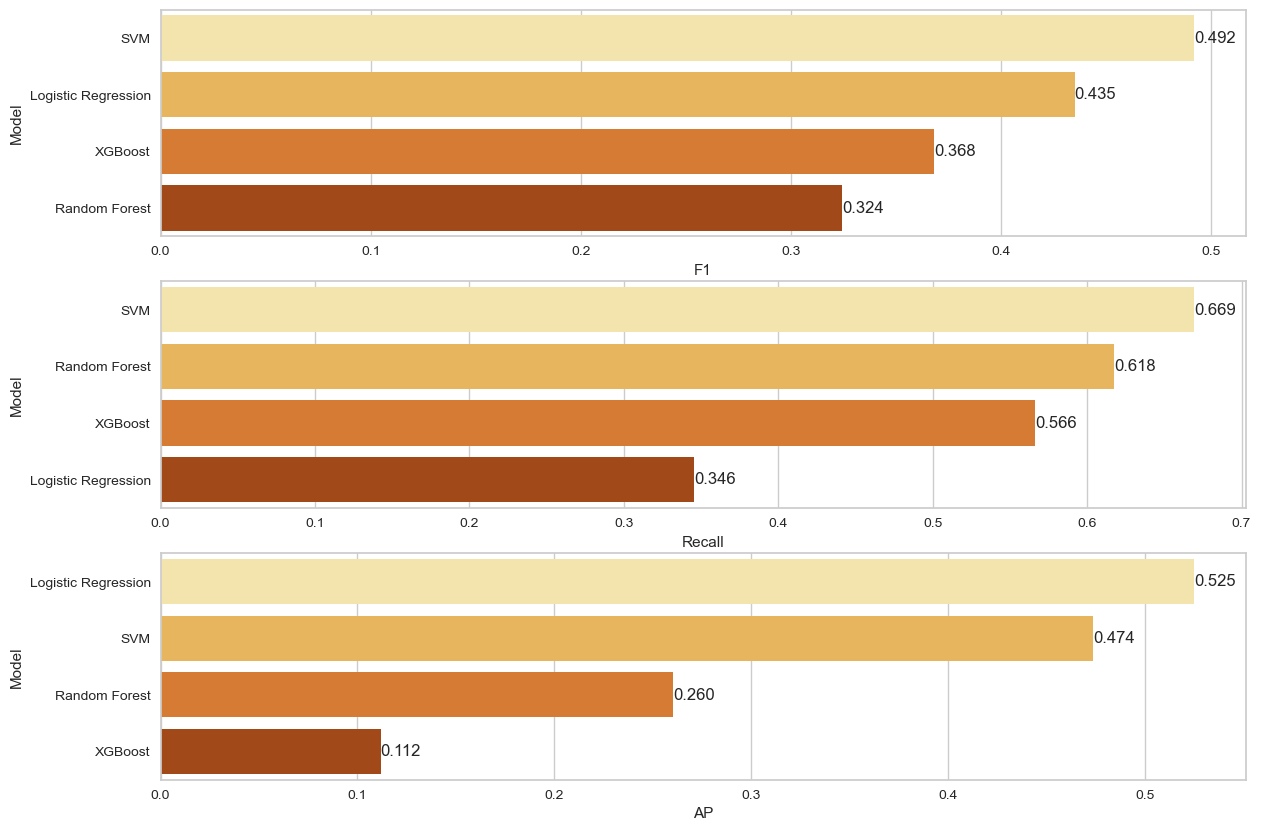

In [149]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

    
plt.figure(figsize=(15,12))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="YlOrBr")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="YlOrBr")
ax.bar_label(ax.containers[0],fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="YlOrBr")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_Before The Deployment_**</p>

- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [150]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                            sparse=False), cat),
                                              remainder=MinMaxScaler())


operations_final = [("scaler", StandardScaler()),
                    ("svc", SVC(class_weight='balanced', random_state=35))]

final_model = Pipeline(steps=operations_final)

In [152]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(class_weight='balanced', random_state=35))])

In [158]:
X[X.Gender_Male=="Male"].describe()

# Datamızdaki tüm erkek askerlerin ortalama değerleri üzerinden modele tahmnin yaptıracağız.

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference   chestdepth  \
count                     3899.000000     3899.000000            3899.000000         3899.000000   3899.000000               3899.00000       3899.000000        3899.000000                3899.000000       3899.000000       3899.000000         3899.000000       3899.000000                3899.000000         3899.000000           3899.000000   3899.000000    3899.000000        3899.000000             3899.000000        3899.000000      3899.000000   3899.000000         3899.000000  3899.000000   
mean                       255.449090     1442.946397             335.819441          229.590921   1331.098487                252.16594        201.229546         416.004360                 358.579636        275.632213        510.927674           74.844063        331.655809                 315.718389          142.434983           1021.294178    246.362401     889.500385         619.217235              504.001026         392.426520      1519.422160    289.786868         1060.496794   254.390100   
std                         37.295117       62.356906              17.281413           14.579399     58.714251                 12.89351         10.329358          19.074837                  34.511924         17.512428         32.450260            4.097052         13.970798                  16.640502            6.141613             76.330564     26.422432      49.412061          30.060334               26.981352          29.698052        62.429846     18.190824           87.116923    26.173356   
min                        163.000000     1194.000000             270.000000          156.000000   1106.000000                186.00000        156.000000         337.000000                 246.000000        219.000000        374.000000           59.000000        281.000000                 259.000000          120.000000            737.000000    171.000000     716.000000         518.000000              418.000000         266.000000      1269.000000    231.000000          774.000000   180.000000   
25%                        228.000000     1401.000000             324.000000          220.000000   1291.000000                244.00000        194.000000         403.000000                 335.000000        263.000000        489.500000           72.000000        322.000000                 305.000000          138.000000            968.500000    227.000000     855.000000         599.000000              486.000000         372.000000      1478.000000    277.000000          999.000000   236.000000   
50%                        252.000000     1441.000000             335.000000          229.000000   1330.000000                252.00000        201.000000         415.000000                 358.000000        275.000000        510.000000           75.000000        332.000000                 315.000000          142.000000           1018.000000    246.000000     887.000000         618.000000              503.000000         392.000000      1518.000000    289.000000         1057.000000   253.000000   
75%                        280.000000     1483.000000             347.000000          239.000000   1368.000000                261.00000        208.000000         428.000000                 380.000000        288.000000        532.000000           77.000000        341.000000                 326.000000          147.000000           1070.000000    263.000000     921.000000         640.000000              522.000000         412.000000      1560.000000    302.000000         1119.000000   272.000000   

In [159]:
male_mean_human = X[X.Gender_Male=="Male"].describe(include="all").loc["mean"]
male_mean_human

# mean değerlerini loc["mean"] ile çekiyoruz. include="all" diyerek kategorik verilerinde döndürülmesini istiyoruz. 
# Kategorik veriler Nan döneceğinden bu kategorik gözlemlere aşağıdaki atamaları yapıyoruz.

abdominalextensiondepthsitting     255.449090
acromialheight                    1442.946397
acromionradialelength              335.819441
anklecircumference                 229.590921
axillaheight                      1331.098487
balloffootcircumference            252.165940
balloffootlength                   201.229546
biacromialbreadth                  416.004360
bicepscircumferenceflexed          358.579636
bicristalbreadth                   275.632213
bideltoidbreadth                   510.927674
bimalleolarbreadth                  74.844063
bitragionchinarc                   331.655809
bitragionsubmandibulararc          315.718389
bizygomaticbreadth                 142.434983
buttockcircumference              1021.294178
buttockdepth                       246.362401
buttockheight                      889.500385
buttockkneelength                  619.217235
buttockpopliteallength             504.001026
calfcircumference                  392.426520
cervicaleheight                   

In [ ]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"

In [161]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  \
mean                       255.44909     1442.946397             335.819441          229.590921   1331.098487                252.16594        201.229546          416.00436                 358.579636        275.632213        510.927674           74.844063        331.655809                 315.718389          142.434983           1021.294178    246.362401     889.500385         619.217235              504.001026          392.42652       1519.42216    289.786868         1060.496794    254.3901   

      chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
mean  1293.040267    847.637599             623.143114                      356.354706   36.095153   64.17107      23.109772       244.823544        804.885099             101.893819  271.573993                  349.57348                  310.528084             580.702231         480.928956          1132.125673    88.379841         212.571172  193.509361   154.183637          574.70813  199.760708              344.002052    72.564504  346.256732         379.948448          1063.41267   

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  kneeheightsitting  lateralfemoralepicondyleheight  lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  palmlength  poplitealheight  radialestylionlength  shouldercircumference  shoulderelbowlength  shoulderlength  sittingheight  sleevelengthspinewrist  sleeveoutseam         span      stature  suprasternaleheight  tenthribheight  \
mean             639.948705  431.393947   450.628623            489.366504         555.224929                      492.625545               73.061554               409.670685           122.684534         398.192101             435.159528                    1428.469351  116.610156       430.684791            268.313927            1179.902539           364.305976      149.832265     918.678636              897.179277     594.007951  1816.628879  1758.385483          1440.699667     1122.444473   

      thighcircumference  thighclearance  thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  waistcircumference  waistdepth  waistfrontlengthsitting  waistheightomphalion    weightkg  wristcircumference  wristheight   Heightin  Gender_Male  
mean          626.335214       180.73942     813.085407    469.222878        131.116697           902.586817                    1666.783278       478.017953    327.110798          943.043344    238.5604                388.01744           1058.239805  858.714286          176.168761   848.762247  70.122083          1.0

In [162]:
final_model.predict(pd.DataFrame(male_mean_human).T)

# erkek askerlerin ortalama değerleri hispanic askerlere çok yakınmış diyebiliriz.

array([0], dtype=int64)

In [163]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

# dengesiz verisetlerinde accuracy güvenilmez bir metrictir. Bu sebeple dengesiz ver setlerinin accuracy'de denen 
# matthews_corrcoef ve cohen_kappa_score kullanılabilir.

0.7581764919131192

In [164]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7471627010209894

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_SMOTE_**</p>
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [178]:
from imblearn.over_sampling import SMOTE # azınlık olan classları çoğunluk classa eşitler veya yakınlaştırır.
from imblearn.under_sampling import RandomUnderSampler # çoğunluk olan classı azınlık olan classa eşitler veya yakınlaştırır
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [ ]:
X_train_ohe = column_trans.fit_transform(X_train)

# Önce manuel olarak X_train ve X_test' one hot encoder dönüşümü uyguluyoruz. 

In [167]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

In [168]:
X_train_over.shape

(9102, 95)

In [169]:
y_train_over.value_counts()

0    3034
1    3034
2    3034
Name: DODRace, dtype: int64

In [170]:
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample(X_train, y_train)

In [171]:
X_train_under.shape

(1629, 95)

In [172]:
y_train_under.value_counts()

# gördüğünüz gibi RandomUnderSampler sonrası tüm classlar azınlık sınıf olan hispanic'in gözlem sayısına eşitlendi.

# coğunluk sınıfı azınlık sınıfa eşitlemek veya yakınlaştırmak çoğunluk classtaki gözlemlerden çok ciddi bilgi kaybına sebep
# verecektir. Skorlar iyileşse de bu iyileşme sadece yalancı bir iyilşeme olacaktır. Bu sebeple Çoğunluk sınıftan %20-%30
# aralığında bir azaltmaya gidilmeli. Ancak hala skorlarda bir iyilşeme yoksa bu oran daha da kesinlikle artırılmamalıdır.

0    543
1    543
2    543
Name: DODRace, dtype: int64

In [173]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

# sampling_strategy hyper_parametresi ile classları isteğimiz sayıda artıra bilir veya azaltabiliriz.

In [174]:
y_train.value_counts()

# orjinal hispanic gözlem sayımız 543 olduğunu görüyoruz.

0    3034
1    1038
2     543
Name: DODRace, dtype: int64

In [ ]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [ ]:
y_resampled_over.value_counts()

# over ile datamızdaki hispanic classının gözlem sayısını yaklaşık 2 katına çıkardık. Ama bu artışın overfitinge sebep
# olup olmadığını aşağıda kontrol etmemiz gerekiyor.

In [ ]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled_under.value_counts()
# white gözlem sayısını yaklaşık %18 civarında azaltıp 2500'e eşitledik.

In [ ]:
# Yaptığımız over_sampling ve under_sampling işlemlerimizi otomotize hale getiriyoruz.
steps = [('o', over), ('u', under)]


pipeline = imbpipeline(steps=steps)

#önce hispanic calsının sayısı bizim verdiğimiz talimat kapsamında 1000'e çıkarılıp, sonra white klası 2500'e indirilecek.
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [ ]:
y_resampled.value_counts()

# hem white hem de hispanic classlarının sayısı değişti.

In [ ]:
y_train.value_counts()

## SVC Over/Under Sampling

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                      sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [183]:
operations = [("scaler", StandardScaler()),('o', over),
              ('u', under), 
              ("svc", SVC(random_state=35))] 

In [184]:
smote_pipeline = imbpipeline(steps=operations)

In [185]:
smote_pipeline.fit(X_train, y_train)

ValueError: The {'Hispanic'} target class is/are not present in the data.

In [186]:
y_train

5667    0
3008    0
4809    0
5438    1
2591    0
       ..
658     0
4265    2
864     0
2623    0
4313    1
Name: DODRace, Length: 4615, dtype: int64

In [ ]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [ ]:
model = imbpipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=scoring,
                        cv=10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_SHAP_**</p>

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

<font  color = 'maroon'><br>
**_Shap datamızdaki tüm featurların classları tahmin etmede ne kadar katkısının olduğunu gösterir.<br><br>
Shap scorlarını elde etmeden önce bize en iyi skoru veren model tespit edilmeli. Yukarda en iyi skoru logistic regressionda aldığımızdan logistic regresssion ile devam edeceğiz. Ancak bir feature selection yapacağımızdan penalty hyper_parametresini l1 (lasso) yapmamız gerekiyor.<br><br>
l1 sag, saga ve liblnear ile kullanılabildiğinden bu solverlardan biri ile devam etmeliyiz. l1 ile en iyi scoru saga solverı verdiğinden solver=saga ile devam edeceğiz.<br><br>
Shap pipeline ile kurulmuş model ile çalışmadığından dönüşüm işlemlerini manuel olarak yapacağız._**

In [ ]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore",
                                                           sparse=False), cat), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)


In [ ]:
X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

In [ ]:

model_shap = SVC(C=0.05, class_weight='balanced', kernel='linear', random_state=35)

model_shap.fit(X_train, y_train)

In [194]:
eval_metric(model_shap, X_train, y_train, X_test, y_test)

Test_Set
[[572  20 166]
 [  6 231  23]
 [ 24  16  96]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       758
           1       0.87      0.89      0.88       260
           2       0.34      0.71      0.46       136

    accuracy                           0.78      1154
   macro avg       0.72      0.78      0.72      1154
weighted avg       0.86      0.78      0.80      1154


Train_Set
[[2315   61  658]
 [  26  937   75]
 [  89   43  411]]
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      3034
           1       0.90      0.90      0.90      1038
           2       0.36      0.76      0.49       543

    accuracy                           0.79      4615
   macro avg       0.74      0.81      0.75      4615
weighted avg       0.87      0.79      0.82      4615



In [195]:
operations = [("OneHotEncoder", column_trans_shap),
              ("svc", SVC(C=0.05, class_weight='balanced', kernel='linear', random_state=35))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train, 
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

# over_fiting yok.

test_precision_Hispanic     0.0
train_precision_Hispanic    0.0
test_recall_Hispanic        0.0
train_recall_Hispanic       0.0
test_f1_Hispanic            0.0
train_f1_Hispanic           0.0
dtype: float64

In [199]:
features = column_trans_shap.get_feature_names_out()
features

# dönüşümü make_column_transform fonksiyonu ile yaptığımızdan X_train_trans ve X_test_trans datalarının feature
# sıralaması aşağıdaki gibi değiştiğinden shap fonksiyonu içinde bu feature sıralamasını kullanacağız.


AttributeError: 'DataFrame' object has no attribute 'get_feature_names_out'

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:left; border-radius:10px 10px;">**_Shap values for test data_**</p>

In [197]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train) #LinearExplainer

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values,  max_display=300, feature_names = features, plot_size=(20,100))

# shap numpy 1.20 veya daha düşük versiyonunu ister.

# X_test datası üzerinden aldığımız shap değerleri data_leakege sebep olabileceğinden. shap değerlerini aşağıda train
# datası üzerinden alacağız.

# shap'ın çoğunlukla linear ve treebased modeller ile kullanımı tavsiye edilsede. KNN , SVM gibi non-parametrik modeller içinde
# shap değerleri alabilirsiniz.

NameError: name 'features' is not defined

### <p style="background-color:#FDFEFE; font-family:newtimeroman; color:red; font-size:150%; text-align:center; border-radius:10px 10px;">**_Shap values for test data_**</p>


In [ ]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, max_display=300, feature_names = features, plot_size=(20,100))

# maviler black, pembe white ve yeşil hispanic
# gördüğünüz gibi en önemli ilk 13 feature içerisinde hispanic'in tahminine katkı sağlayan feature yok.
# hispaniclerin predictionesine katkısı olan 19 feature seçiyoruz.

In [ ]:
hispanic=["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
          'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 
          'tragiontopofhead','bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 
          'buttockkneelength', 'earlength', 'axillaheight', "Age"]

In [ ]:
X_2 = X[hispanic]
X_2.head()

In [ ]:
cat_new = X2.select_dtypes("object").columns
cat_new

In [ ]:
X2.shape

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y, test_size=0.2, random_state=35, stratify =y)

In [ ]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", 
                                                           sparse=False), cat_new), 
                                             remainder=MinMaxScaler(),
                                             verbose_feature_names_out=False)

operations_shap = [("OneHotEncoder",column_trans_shap),
                   ("svc", SVC(C=0.05, class_weight='balanced', kernel='linear', random_state=35))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

In [ ]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, 
                        X_train2,
                        y_train2, 
                        scoring=scoring,
                        cv=5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

In [ ]:
model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show();